In [4]:
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [5]:
from pathlib import Path

In [6]:
!ls

Untitled.ipynb              first.sh
cv_test_en_b0_mlp.csv       second.sh
cv_test_en_b1_mlp.csv       second_a.sh
cv_test_en_b2_mlp.csv       submission.csv
cv_test_en_b3_mlp.csv       submission_b0.csv
cv_test_en_b4_mlp.csv       submission_b1.csv
cv_test_en_b5_mlp.csv       submission_b2.csv
cv_test_en_b6_mlp.csv       submission_b3.csv
ensemble.py                 submission_b4.csv
ensemble2.py                submission_b5.csv
ensemble3.py                submission_b6.csv
ensemble4.py                submission_mean_0_4.csv
ext_1.sh                    submission_mean_0_6.csv
external_meta_ensembled.csv submission_mean_ext_0_4.csv


In [37]:
sub_en = pd.concat([pd.read_csv(f"./submission_b{n}.csv", index_col=0) for n in range(7)], axis=1)
sub_en.columns = [f"b{n}" for n in range(7)]
sub_en = 0.95 / 0.85 * sub_en

In [38]:
sub_ext = pd.concat([pd.read_csv(f"../ensemble_study/submission_model_{n}.csv", index_col=0) for n in range(3)], axis=1)
sub_ext.columns = [f"ext-b{n}" for n in range(3,6)]
sub_ext.index = sub_en.index

In [39]:
sub_all = pd.concat([sub_en, sub_ext],axis=1)

In [40]:
sub_all

,b0,b1,b2,b3,b4,b5,b6,ext-b3,ext-b4,ext-b5
image_name,,,,,,,,,,
ISIC_0052060,0.021230,0.027520,0.025677,0.027453,0.026159,0.030840,0.032944,0.030027,0.026441,0.029252
ISIC_0052349,0.020981,0.022373,0.021962,0.022172,0.024369,0.021274,0.035460,0.030862,0.022672,0.025892
ISIC_0058510,0.018601,0.021460,0.021813,0.021348,0.020445,0.019920,0.026222,0.026873,0.027467,0.023347
ISIC_0073313,0.016839,0.020471,0.020870,0.021349,0.020095,0.018700,0.026326,0.029645,0.028774,0.024349
ISIC_0073502,0.020225,0.024390,0.025889,0.025638,0.024164,0.025134,0.036768,0.033726,0.050182,0.021811
...,...,...,...,...,...,...,...,...,...,...
ISIC_9992485,0.016108,0.022162,0.020717,0.018308,0.017876,0.018598,0.026915,0.024339,0.020030,0.021219
ISIC_9996992,0.019921,0.022971,0.022544,0.021859,0.024377,0.026450,0.032168,0.039130,0.055927,0.030067
ISIC_9997917,0.048140,0.034717,0.043929,0.035821,0.059366,0.048388,0.074610,0.021463,0.056908,0.026507


In [41]:
sub_all.describe()

,b0,b1,b2,b3,b4,b5,b6,ext-b3,ext-b4,ext-b5
count,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000
mean,0.027981,0.035676,0.035521,0.033338,0.033779,0.033625,0.039391,0.039921,0.043762,0.038444
std,0.030093,0.047977,0.045489,0.039305,0.046506,0.042090,0.032695,0.052258,0.071335,0.063308
min,0.011583,0.012218,0.013339,0.011472,0.012755,0.012595,0.014544,0.007276,0.009125,0.015007
25%,0.019062,0.022776,0.022642,0.022081,0.021814,0.021300,0.026921,0.026680,0.024099,0.023128
50%,0.021983,0.026335,0.026294,0.025844,0.025044,0.024441,0.031605,0.029103,0.027410,0.025502
75%,0.026984,0.032188,0.032450,0.031543,0.029999,0.030424,0.039823,0.034119,0.034317,0.030672
max,0.760858,0.811979,0.780882,0.763848,0.794016,0.778335,0.823509,0.986201,0.987272,0.984349


In [42]:
sub_all.nlargest(30, "ext-b5")

,b0,b1,b2,b3,b4,b5,b6,ext-b3,ext-b4,ext-b5
image_name,,,,,,,,,,
ISIC_2839742,0.375447,0.777842,0.717486,0.639471,0.612660,0.568208,0.240599,0.986201,0.987272,0.984349
ISIC_4359352,0.174270,0.317833,0.218095,0.292372,0.267467,0.165698,0.116001,0.461662,0.750119,0.946733
ISIC_2560699,0.283070,0.595215,0.602466,0.493459,0.546821,0.435856,0.226478,0.865924,0.927341,0.924973
ISIC_8344285,0.105646,0.536403,0.283507,0.124747,0.208479,0.383031,0.171847,0.284774,0.616173,0.924893
ISIC_7318419,0.161769,0.337182,0.303516,0.297399,0.179069,0.144589,0.068706,0.832073,0.633013,0.908814
ISIC_9478088,0.236337,0.547463,0.437669,0.177563,0.412543,0.213275,0.311464,0.605034,0.640612,0.906813
ISIC_3412012,0.239358,0.636655,0.540839,0.430442,0.343665,0.222875,0.143499,0.870210,0.784808,0.899891
ISIC_7880400,0.046738,0.118685,0.031555,0.033577,0.109287,0.048379,0.079130,0.288527,0.734423,0.898963
ISIC_5423741,0.074910,0.300657,0.173665,0.139231,0.171007,0.154692,0.098801,0.327965,0.864660,0.884272


In [36]:
0.95 / 0.85

1.1176470588235294

In [50]:
rank_by_means = sub_all.rank().mean(axis=1).sort_values()

In [52]:
rank_by_means.iloc[:64]

image_name
ISIC_7540893    238.2
ISIC_9020555    260.3
ISIC_0411243    294.9
ISIC_1371478    311.9
ISIC_0197182    314.2
                ...  
ISIC_0749202    886.5
ISIC_5215433    888.0
ISIC_6701974    889.2
ISIC_7866404    898.1
ISIC_4799228    901.8
Length: 64, dtype: float64

In [53]:
rank_by_means.iloc[:128]

image_name
ISIC_7540893     238.2
ISIC_9020555     260.3
ISIC_0411243     294.9
ISIC_1371478     311.9
ISIC_0197182     314.2
                 ...  
ISIC_7386428    1058.5
ISIC_8681990    1058.5
ISIC_7080136    1059.5
ISIC_7244482    1063.7
ISIC_8185342    1064.7
Length: 128, dtype: float64

/Users/argon/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='image_name'>

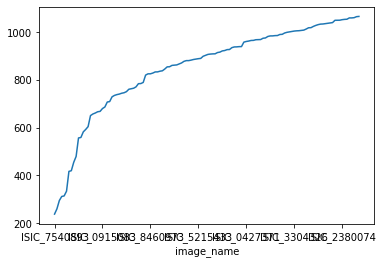

In [72]:
rank_by_means.iloc[:128].plot()

/Users/argon/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='image_name'>

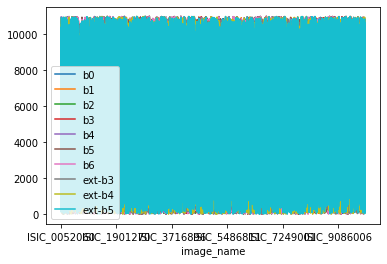

In [59]:
sub_all.rank().plot()

In [73]:
sub_val_en = pd.concat([pd.read_csv(f"./cv_val_en_b{n}_mlp.csv", index_col=0) for n in range(7)], axis=1)
sub_val_en.columns = [f"b{n}" for n in range(7)]

In [74]:
target = pd.read_csv("../../../input/my-isic2020-csv/train.csv", index_col=0)["target"]

In [75]:
target

image_name
ISIC_2637011    0
ISIC_0015719    0
ISIC_0052212    0
ISIC_0068279    0
ISIC_0074268    0
               ..
ISIC_0024302    1
ISIC_0024303    1
ISIC_0024304    1
ISIC_0024305    1
ISIC_0036065    1
Name: target, Length: 59037, dtype: int64

In [82]:
fpr, tpr, thresholds = roc_curve(target.values, sub_val_en["b"].values)

In [84]:
fpr.shape

(10338,)

In [86]:
tpr.shape

(10338,)

In [87]:
thresholds.shape

(10338,)

In [88]:
import matplotlib.pyplot as plt

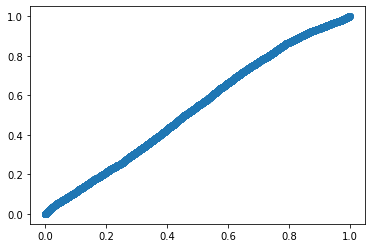

In [89]:
plt.plot(fpr, tpr, marker='o')